In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('Wholesale Customers data.csv')
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [16]:
X = data.drop(['Channel', 'Region'], axis=1)  # Exclude 'Channel' and 'Region' columns
y = data['Channel']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
y_pred = clf.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8863636363636364


In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[58  7]
 [ 3 20]]


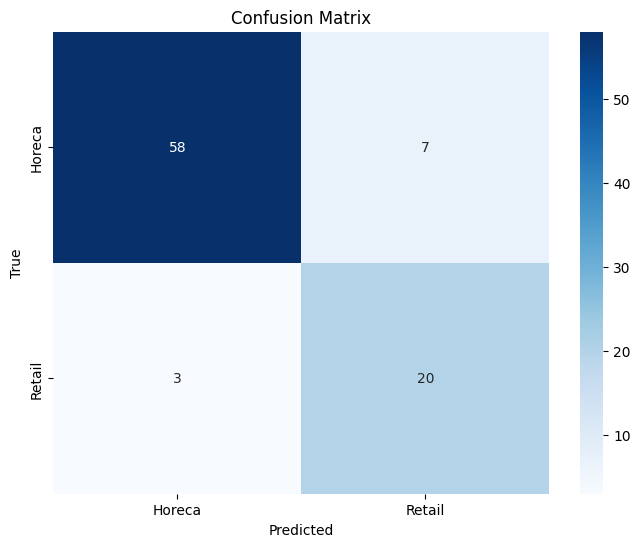

In [22]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Horeca', 'Retail'], yticklabels=['Horeca', 'Retail'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

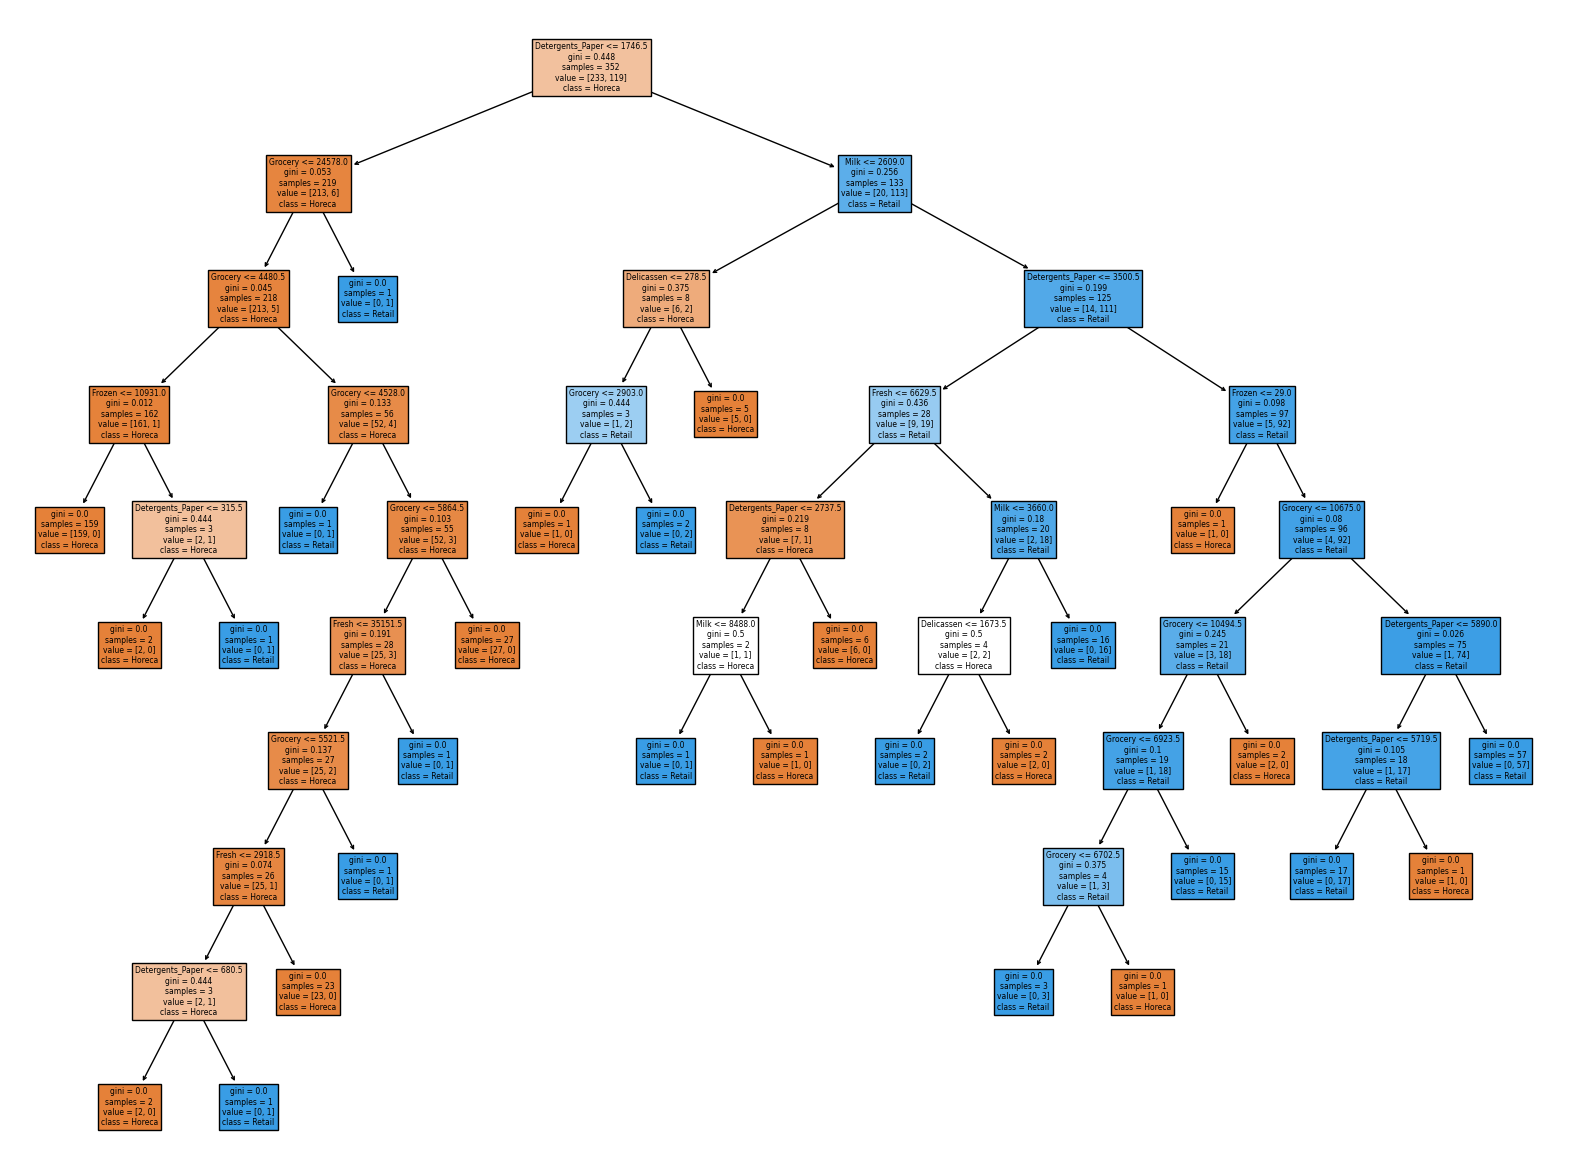

In [12]:
plt.figure(figsize=(20, 15))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=['Horeca', 'Retail'])
plt.show()